In [1]:
%run ego.py
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.externals import joblib

In [3]:
%run preprocess.py

In [4]:
pre = Preprocess(all_dat='all_games.pkl', pca_model='eco_full_pca.pkl')
# pre.train_pca()
#pre = Preprocess(pca_model='eco_full_pca.pkl', all_dat='all_games.pkl')
#pre.get_json("alluser_control.json")

In [5]:
#pre.train_pca()

X, y = pre.ready_player_one(2)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scale = StandardScaler()
scale = MinMaxScaler((-1.,1.))
X = scale.fit_transform(X)

In [6]:
X.shape

(33L, 30L)

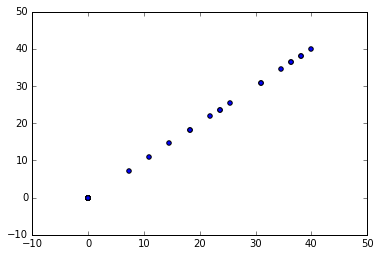

In [7]:
rKrig = Kriging(np.ones(30))
rKrig.fit(X,y)
plt.scatter(rKrig.yhat(X), y)

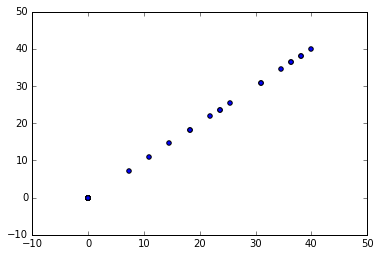

In [8]:
plt.scatter(rKrig.yhat(X), y)

In [9]:
err =np.abs(rKrig.yhat(X) - y)
np.sum(err>0.01)

0

In [10]:
np.argmax(err)

15

E:\ProgramFiles_w\Engineering\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


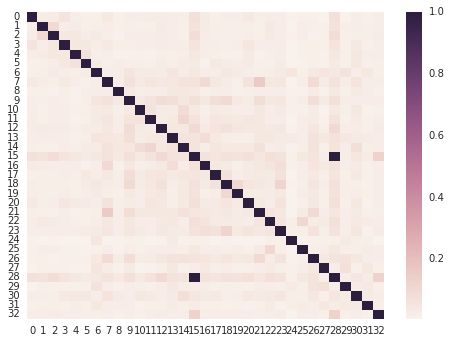

In [11]:
import seaborn as sns
sns.heatmap(rKrig.R)

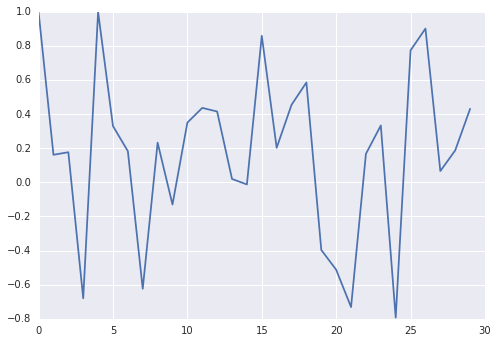

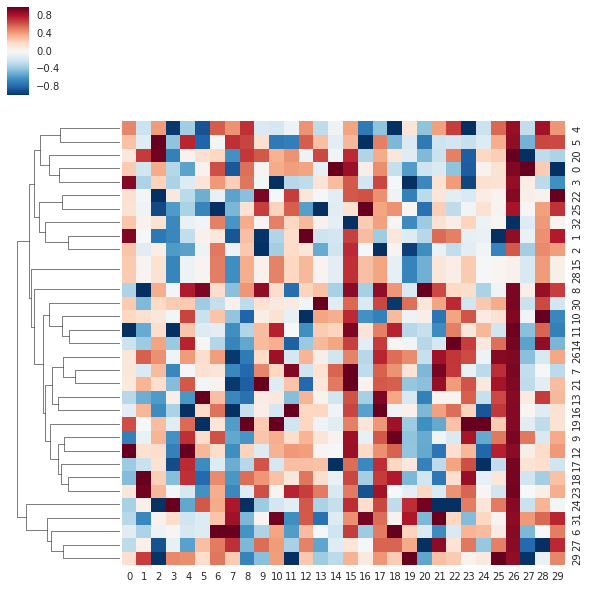

In [12]:
plt.plot(X[12])
sns.clustermap(X, col_cluster=False)

In [15]:
scores = []
for i in np.linspace(.001, 2.5, num=150):
    scores += [rKrig.obj(np.ones(30)*i)]

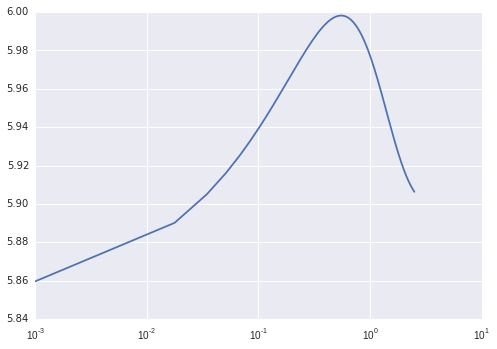

In [16]:
plt.semilogx(np.linspace(0.001, 2.5, num=150), scores)

5.81416003144
0.1
0.155056179775
0.210112359551
0.265168539326
0.320224719101
0.375280898876
0.430337078652
0.485393258427
0.540449438202
0.595505617978
0.650561797753
0.705617977528
0.760674157303
0.815730337079
0.870786516854
0.925842696629
0.980898876404
1.03595505618
1.09101123596
1.14606741573
1.20112359551
1.25617977528
1.31123595506
1.36629213483
1.42134831461
1.47640449438
1.53146067416
1.58651685393
1.64157303371
1.69662921348
1.75168539326
1.80674157303
1.86179775281
1.91685393258
1.97191011236
2.02696629213
2.08202247191
2.13707865169
2.19213483146
2.24719101124
2.30224719101
2.35730337079
2.41235955056
2.46741573034
2.52247191011
2.57752808989
2.63258426966
2.68764044944
2.74269662921
2.79775280899
2.85280898876
2.90786516854
2.96292134831
3.01797752809
3.07303370787
3.12808988764
3.18314606742
3.23820224719
3.29325842697
3.34831460674
3.40337078652
3.45842696629
3.51348314607
3.56853932584
3.62359550562
3.67865168539
3.73370786517
3.78876404494
3.84382022472
3.89887640449


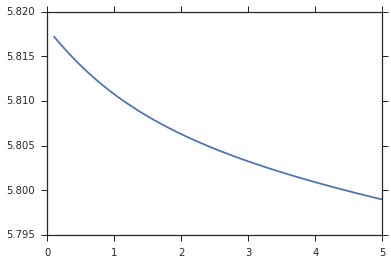

In [267]:
scores = []
end=5.
sig = .47*np.ones(30)
print rKrig.obj(sig)
for i in np.linspace(0.1,end, num=90):
    print i
    sig[7] = i
    #sig[23] = 1.5372117405542511 + i
    scores += [rKrig.obj(sig)]
plt.plot(np.linspace(0.1, end, num=90), scores)


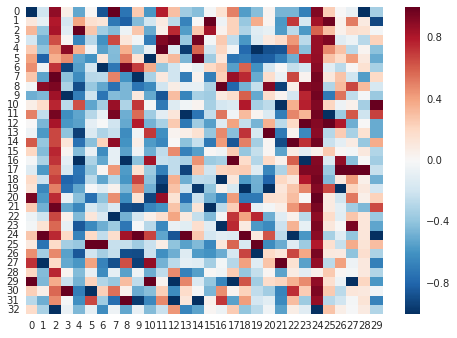

In [17]:
sns.heatmap(X)

In [23]:
np.argmax(scores), np.linspace(0.001, 2.5, num=150)[np.argmax(scores)]

(33, 0.55446979865771817)

In [13]:
top6 = [78, 122, 166, 70, 67, 69] #best players
m1, m2, m3, m4, m5, m6 = [pre.full_tab.userid.values==i for i in top6]
masks = [m1, m2, m3, m4, m5, m6]
p1=pre.all_dat[masks[0]]
p1_score=pre.full_tab["rem_nrg"].values[masks[0]]

##### 

In [25]:
np.sum(np.abs(p1[157] - p1[156]))

0.0

6.45470727039


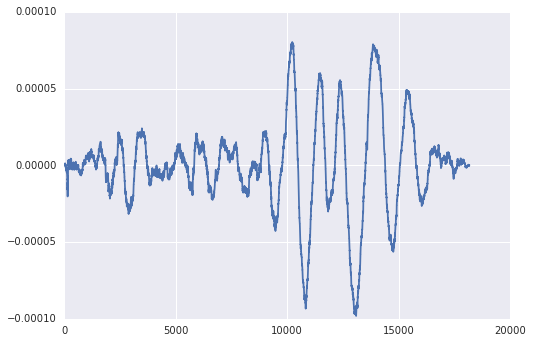

In [14]:
x0 = np.zeros(30)+1e-25
x0[7] = 2.5+1

# x0=[0.0, 6.499381996753761e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
#  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
#  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2254259037577679, 0.0, 0.0]

x0=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0,1.06277724, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

print rKrig.obj(x0)
# plt.plot(abs(x0[-3]*pre.pca.components_[-3]))
plt.plot(pre.pca.components_[12])

In [33]:
import pickle, json
#json.load('sigma.pickle')
#best_sig = pickle.load( open( "sigma.pickle" ) )
# best_sig = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03609014917654113,
#             0.0, 0.0, 0.06831954374501899, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
#             0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
best_sig = x0[:]

best_sig =[1.4003556249805395e-09, 
 0.8770872708190162, 
 6.699115585498475e-10, 
 1.2246055035507815e-09, 
 1.4617329790232723e-09, 
 1.2971872968514182e-09, 
 8.223281506854913e-10, 
 1.1124353800925194e-09, 
1.4011808735933055e-09, 
1.1391687078785232e-09, 
1.0930081500349922e-09, 
1.2478635608519704e-09, 
1.3424357154410064e-09, 
1.2973572981935001e-09, 
1.1994425884369962e-09, 
8.355051998043364e-10, 
1.381869657781085e-09, 
1.5727546008957795e-09, 
1.221509154681601e-09, 
1.2778715265573693e-09, 
1.2457034894768922e-09, 
0.11290195396718902, 
1.0690774334688006e-09, 
1.2057260106677392e-09, 
1.4137627452666861e-09, 
1.490148866623118e-09, 
2.3944736622575907e-10, 
8.7374850919451e-10, 
1.3655960389999447e-09, 
1.306856532148027e-09]

7.0986091676063756

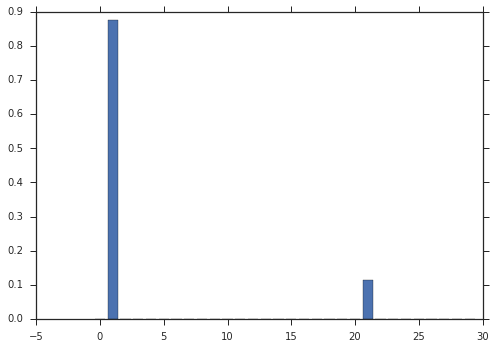

In [34]:
plt.bar(range(30), best_sig, align='center')
rKrig.obj(best_sig)

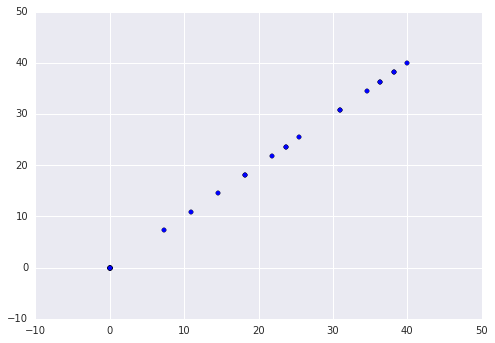

In [22]:
bestKrig = Kriging(best_sig)
bestKrig.fit(X,y)
plt.scatter(bestKrig.yhat(X), y)

array([[  1.82959752e+01,   2.86504535e-02,  -3.81096191e+00, ...,
          1.97121264e-01,   2.30533436e-02,   9.12533393e-02],
       [  2.86504535e-02,   9.23801131e+00,   4.99428194e-02, ...,
          9.05818341e-02,   9.32443239e-02,  -1.58845611e+00],
       [ -3.81096191e+00,   4.99428194e-02,   2.15113524e+01, ...,
          1.09607049e-01,   1.87082473e-02,   2.58999839e-01],
       ..., 
       [  1.97121264e-01,   9.05818341e-02,   1.09607049e-01, ...,
          6.96259353e+00,  -1.34357321e+00,   8.62539626e-04],
       [  2.30533436e-02,   9.32443239e-02,   1.87082473e-02, ...,
         -1.34357321e+00,   3.22996060e+00,   1.43037453e-02],
       [  9.12533393e-02,  -1.58845611e+00,   2.58999839e-01, ...,
          8.62539626e-04,   1.43037453e-02,   3.50264630e+01]])

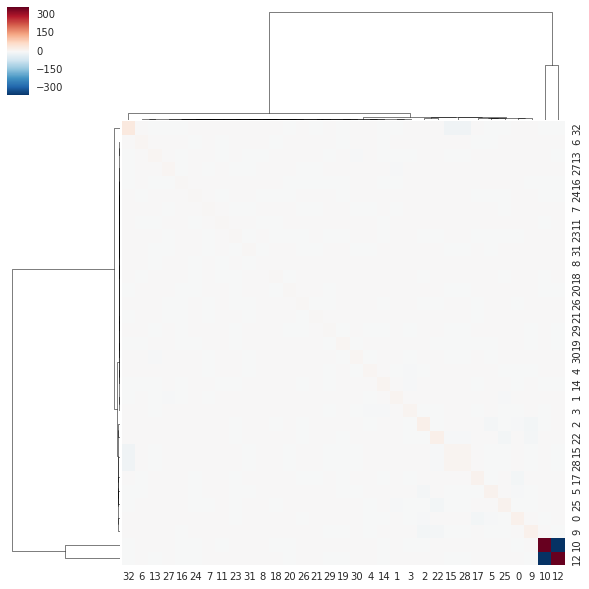

In [23]:
sns.clustermap(bestKrig.RI)
bestKrig.RI

In [31]:
from scipy.sparse import diags, linalg, issparse, csc_matrix

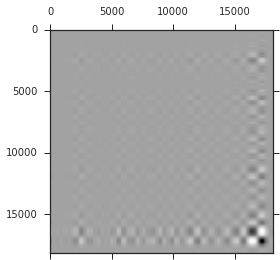

In [115]:
sig = np.zeros(30)
sig[20] = 4.2117034102629782

A = pre.pca.components_
Std_inv = diags([1/scale.std_], [0])
vis = A.T.dot(Std_inv.dot(np.diag(sig).dot(Std_inv.dot(A))))
plt.matshow(vis)

#np.savetxt('visualize_this.txt', vis)

In [ ]:
issparse(vis)
from numpy import ma
x1 = ma.masked_inside(vis, -1e-6, 1e-6)
vis_sp = csc_matrix(ma.filled(x1, 0))
issparse(vis_sp)
#sns.distplot(vis.flatten())

In [ ]:
plt.plot(np.diag(vis))
plt.axhline(y=1e-6, xmin=0, xmax=15000)
from scipy import io

#io.mmwrite("test.mtx", vis_sp)
#del vis, vis_sp

In [53]:
from scipy.linalg import pinv2, inv
#vis_sp = io.mmread("test.mtx")
visI = pinv2(vis)
#plt.imshow(visI)

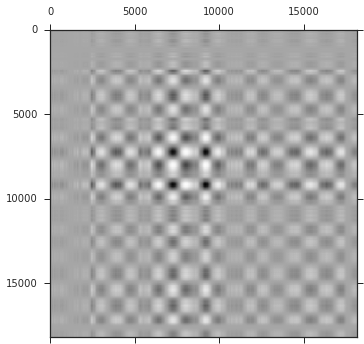

In [55]:
visI.shape
plt.matshow(visI)

In [ ]:
A[:2].sum(axis=0)

In [ ]:
import tables
h5file = tables.openFile('visI.h5', mode='w', title="P2 Solved Variance")
root = h5file.root
h5file.createArray(root, "visI", visI)
h5file.close()

In [ ]:
h5 = tb.open_file('visI.h5', 'r')
a = h5.root.data
row = a[0,:] #only one row gets loaded into memory
print row

In [24]:
data = [0,0,10,20,30,40,50,60,70,80,90,90,90,60,30,0,0,0,0,0,5,10,20,40,60,80,90,90,90,90,70,50,30,30,30,30,30,10,10,10,40,70,70,70,90,90,90,70,50,30,10,0,0,0,40,80,80,80,80,70,60,50,40,30,20,10,0,0,10,20,30,40,50,60,70,80,80,80,70,60,50,40,40,40,60,80,80,80,60,40,20,0,0,0,0,0]

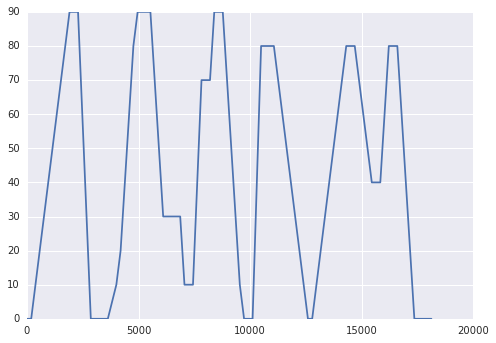

In [25]:
sns.set_style('darkgrid')
plt.plot(np.linspace(0,18120,num=96), data)

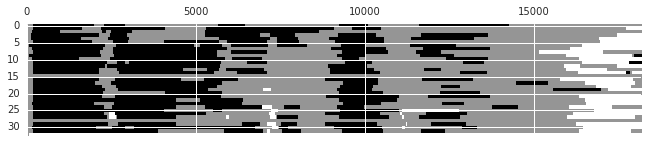

In [26]:
p2=pre.all_dat[masks[1]]
plt.figure(figsize=(15,5))
plt.matshow(p2, aspect=100)

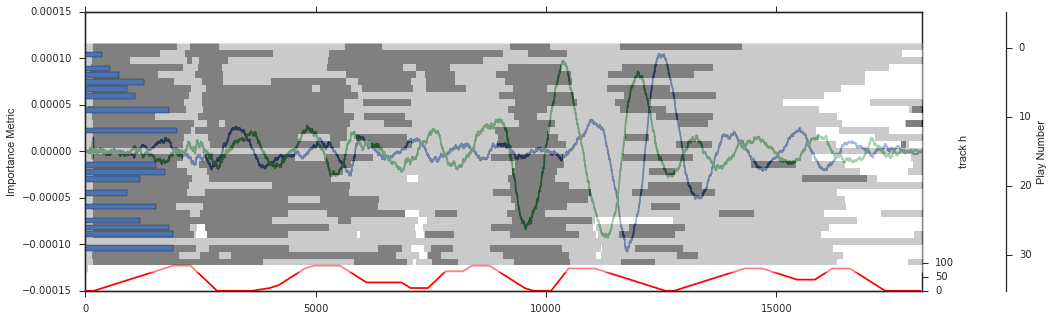

In [41]:
sns.set_style('ticks')
fig, host = plt.subplots(figsize=(15,5))

#host.plot(np.diag(visI))

ax2 = host.twinx()
ax1 = host.twinx()
ax1.matshow(p2, aspect=150, alpha=.5)
ax2.plot(np.linspace(0,18120,num=96), data, color='r')
ax2.set_ylim(0,1000)
host.set_xlim(0,18160)
host.set_ylabel("Importance Metric")
ax1.spines["right"].set_position(("axes", 1.1))
ax1.set_ylabel("Play Number")
ax2.set_yticks([0., 50., 100.]);
ax2.set_ylabel("track h")
ax1.barh(range(33), 50*y, align='center')
#host.plot(1/(np.diag(visI)+.0001))
host.plot(pre.pca.components_[1])
host.plot(pre.pca.components_[21])


In [70]:
full_space = pre.pca.transform(pre.all_dat)
bounds = np.zeros((30,2))
for i,n in enumerate(full_space.T):
    bounds[i] = [np.min(n)-1, np.max(n)+1]
bounds
np.savetxt('ego_bounds.txt', bounds, delimiter=',', fmt='%.4e')

In [39]:
y.max(), y.argmax()

(40.000000000000007, 12)

In [77]:
1/np.diag(vis)
import cPickle as pickle
best_sig = pickle.load( open( "sigma.pickle" ) )

In [ ]:
u,v = (np.array([2,2, 2], ndmin=2).T, np.array([0,0, 0], ndmin=2).T)

from scipy.spatial.distance import cdist, mahalanobis, pdist
pdist(np.column_stack((u,v)).T, 'mahalanobis', VI = np.eye(3))**2, mahalanobis(u,v, VI=np.eye(3))**2

In [ ]:
u,v, np.column_stack((u,v))

In [ ]:
np.sqrt(12)

In [ ]:
(u-v).T.dot(np.eye(3).dot(u-v))

In [ ]:
np.argsort(best_sig)

In [2]:
import pickle
best_sig = pickle.load( open( "sigma.pickle" ) )
np.argmax(best_sig), np.max(best_sig)


NameError: name 'np' is not defined

-4.2
-4.06666666667
-3.93333333333
-3.8
-3.66666666667
-3.53333333333
-3.4
-3.26666666667
-3.13333333333
-3.0


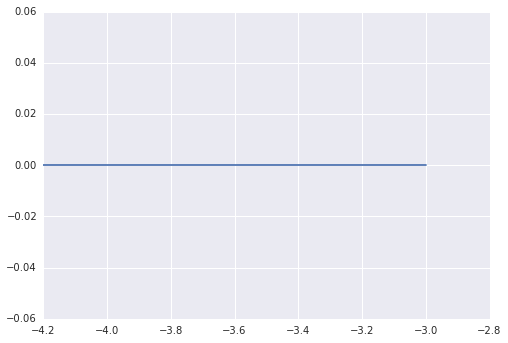

In [38]:
scores = []
for i in np.linspace(-4.2, -3, num=10):
    sig = np.copy(best_sig)
    print i
    sig[20] = 4.2117034102629782 + i
    #sig[23] = 1.5372117405542511 + i
    scores += [rKrig.obj(sig)]
plt.plot(np.linspace(-4.2, -3, num=10), scores)

0.0

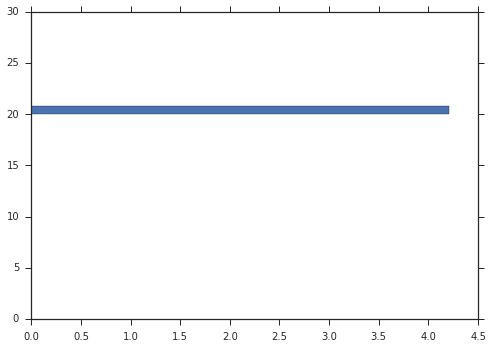

In [51]:
plt.barh(range(30), best_sig)
rKrig.obj(best_sig)

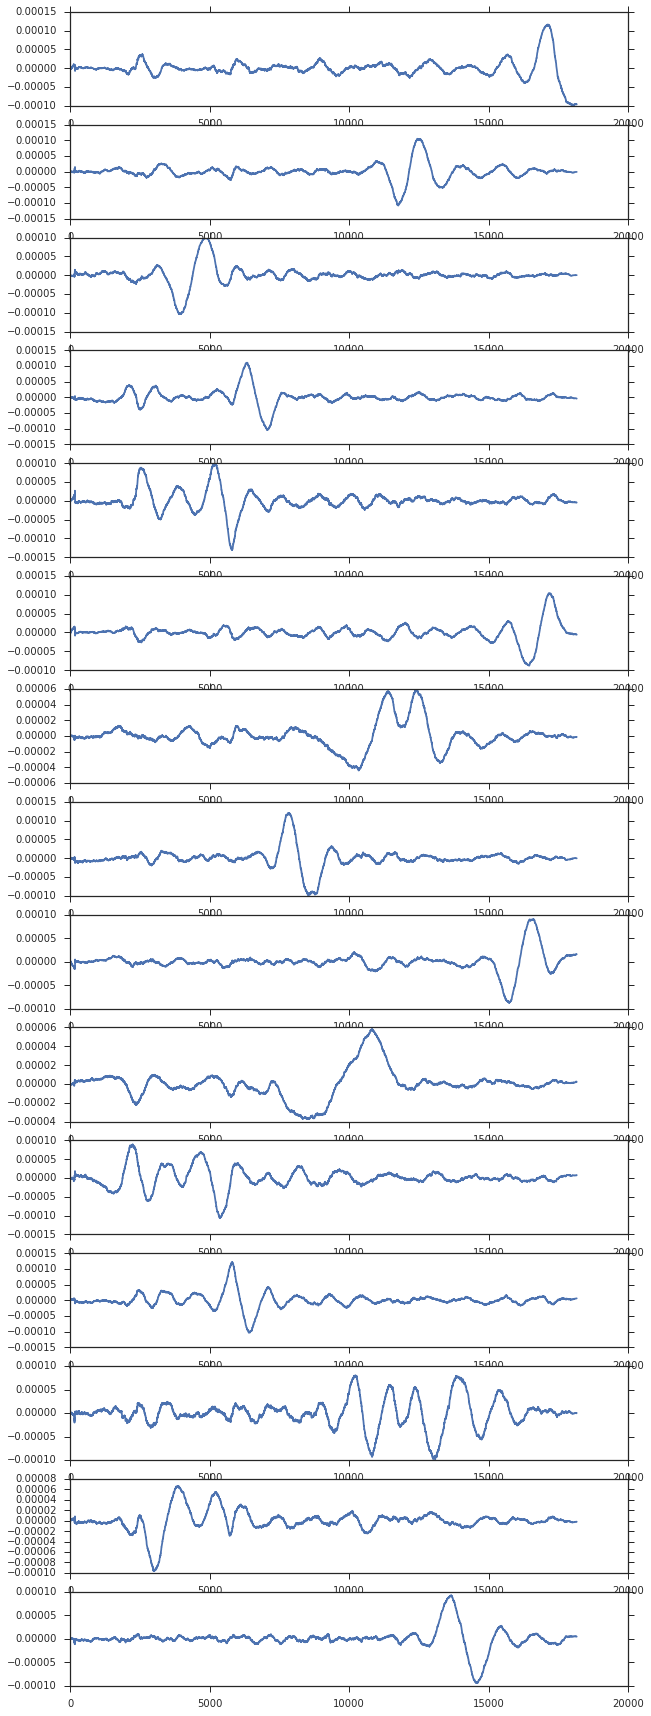

In [36]:
plt.figure(figsize=(10,30))
for i in range(15):
    plt.subplot(15,1,i+1)
    plt.plot(pre.pca.components_[i])

In [37]:
A.shape

NameError: name 'A' is not defined

In [62]:
from bayes_opt import BayesianOptimization

bo = BayesianOptimization()

TypeError: __init__() takes at least 3 arguments (1 given)

In [26]:
varlist = ['x'+str(i) for i in range(30)]
d = dict.fromkeys(varlist,0)


for n,i in enumerate(varlist):
    d[i] = [0,5]
d
pickle.dump( d, open( "ego_bds.p", "wb" ) )

In [27]:
pickle.load( open( "ego_bds.p", "rb" ) )

{'x0': [0, 5],
 'x1': [0, 5],
 'x10': [0, 5],
 'x11': [0, 5],
 'x12': [0, 5],
 'x13': [0, 5],
 'x14': [0, 5],
 'x15': [0, 5],
 'x16': [0, 5],
 'x17': [0, 5],
 'x18': [0, 5],
 'x19': [0, 5],
 'x2': [0, 5],
 'x20': [0, 5],
 'x21': [0, 5],
 'x22': [0, 5],
 'x23': [0, 5],
 'x24': [0, 5],
 'x25': [0, 5],
 'x26': [0, 5],
 'x27': [0, 5],
 'x28': [0, 5],
 'x29': [0, 5],
 'x3': [0, 5],
 'x4': [0, 5],
 'x5': [0, 5],
 'x6': [0, 5],
 'x7': [0, 5],
 'x8': [0, 5],
 'x9': [0, 5]}

In [28]:
varlist = ['x'+str(i) for i in range(30)]
c = dict.fromkeys(varlist,0)


for n,i in enumerate(varlist):
    c[i] = [1./j for j in range(1,20)]

pickle.dump( c, open( "ego_explore.p", "wb" ) )

In [29]:
pickle.load( open( "ego_explore.p", "rb" ) )

{'x0': [1.0,
  0.5,
  0.3333333333333333,
  0.25,
  0.2,
  0.16666666666666666,
  0.14285714285714285,
  0.125,
  0.1111111111111111,
  0.1,
  0.09090909090909091,
  0.08333333333333333,
  0.07692307692307693,
  0.07142857142857142,
  0.06666666666666667,
  0.0625,
  0.058823529411764705,
  0.05555555555555555,
  0.05263157894736842],
 'x1': [1.0,
  0.5,
  0.3333333333333333,
  0.25,
  0.2,
  0.16666666666666666,
  0.14285714285714285,
  0.125,
  0.1111111111111111,
  0.1,
  0.09090909090909091,
  0.08333333333333333,
  0.07692307692307693,
  0.07142857142857142,
  0.06666666666666667,
  0.0625,
  0.058823529411764705,
  0.05555555555555555,
  0.05263157894736842],
 'x10': [1.0,
  0.5,
  0.3333333333333333,
  0.25,
  0.2,
  0.16666666666666666,
  0.14285714285714285,
  0.125,
  0.1111111111111111,
  0.1,
  0.09090909090909091,
  0.08333333333333333,
  0.07692307692307693,
  0.07142857142857142,
  0.06666666666666667,
  0.0625,
  0.058823529411764705,
  0.05555555555555555,
  0.05263157

In [62]:
from sklearn.decomposition import FastICA
FastICA()

In [41]:
rounds=np.array([-1., 0., 1.])
x_proj=pre.pca.inverse_transform(scale.inverse_transform(X))
x_est= np.subtract.outer(x_proj[0], rounds)
y_est = np.argmin(abs(x_est), axis=1)

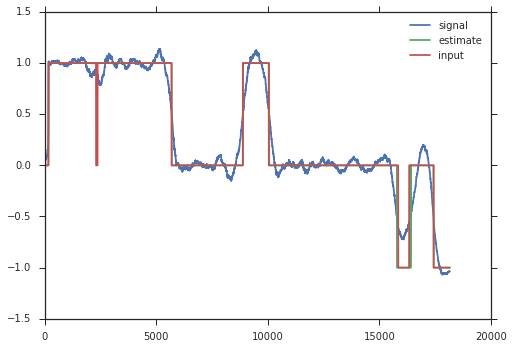

In [38]:
n=12
rounds=np.array([-1., 0., 1.])
x_proj=pre.pca.inverse_transform(scale.inverse_transform(X))
x_est= np.subtract.outer(x_proj[n], rounds)
y_est = np.argmin(abs(x_est), axis=1)
plt.plot(x_proj[n], label='signal')
plt.plot(rounds[y_est], label='estimate')
plt.plot(pre.all_dat[masks[1]][n], label='input')
plt.legend()

(30L,)


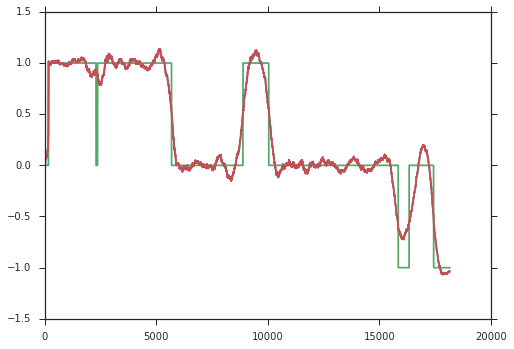

In [39]:

test_x = X[12]
check_x = pre.pca.inverse_transform(scale.inverse_transform(X))[12]

test_x = (test_x-scale.min_)/scale.scale_ #de-scale it
test_x = np.dot(test_x, pre.pca.mixing_.T)+ pre.pca.mean_ #project back/whiten
plt.plot(test_x)

print scale.min_.shape
plt.plot(pre.all_dat[masks[1]][12])
plt.plot(check_x)

(33L, 18160L)


AttributeError: 'MinMaxScaler' object has no attribute 'size'

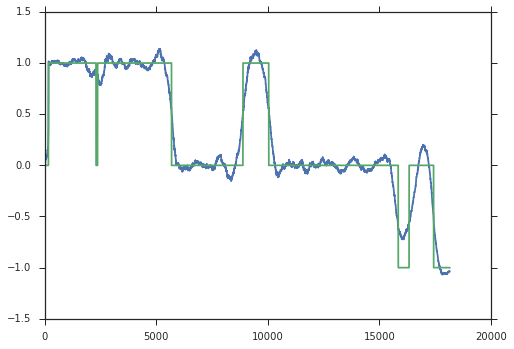

In [40]:

test_x = np.copy(X)
check_x = pre.pca.inverse_transform(scale.inverse_transform(X))

test_x = (test_x-scale.min_)/scale.scale_ #de-scale it
test_x = np.dot(test_x, pre.pca.mixing_.T)+ pre.pca.mean_ #project back/whiten
plt.plot(test_x[12])

print test_x.shape
plt.plot(pre.all_dat[masks[1]][12])
# plt.plot(check_x[12])
scale.size

18160
0.416666666667


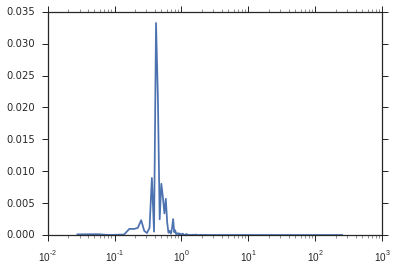

In [345]:
from numpy.fft import fftfreq, fft

# plt.semilogx(np.abs(fft(pre.pca.components_[0]))**2)
# plt.semilogx(np.abs(fft(pre.pca.components_[3]))**2)
# np.max(np.abs(fft(pre.pca.components_[0]))**2)

def spect(data):
    
    ps = np.abs(np.fft.fft(data))**2
    print data.size
    time_step = 36./ data.size
    freqs = np.fft.fftfreq(data.size, time_step)
    idx = np.argsort(freqs)

    plt.semilogx(freqs[idx], ps[idx])
    print  freqs[np.argmax(ps)]
# spect(pre.pca.components_[12])
spect(pre.pca.components_[0])

ValueError: x and y must have same first dimension

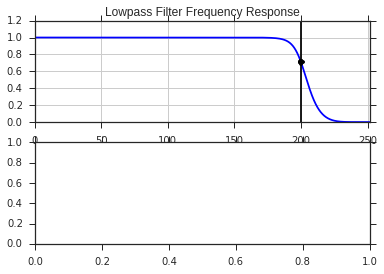

In [189]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 18120./36.      # sample rate, Hz
cutoff = 200  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


T = 36.0         # seconds
n = 18120 # total number of samples
t = np.linspace(0, T, n, endpoint=False)

y_fil = butter_lowpass_filter(pre.pca.components_[10],
                          cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y_fil, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)

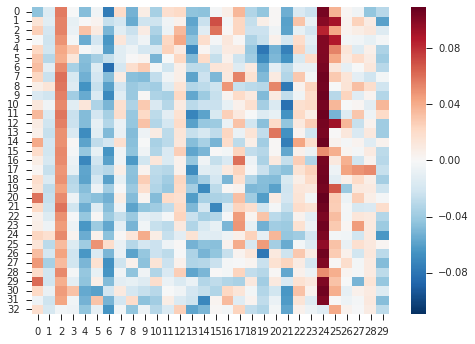

In [135]:
sns.heatmap((X+scale.min_)/scale.scale_)
#sns.heatmap(X)
with open('p2_range_transform.json', 'w') as outfile:
     json.dump({'range':scale.scale_.tolist(), 'min':scale.min_.tolist()}, 
               outfile, sort_keys = True, indent = 4, ensure_ascii=False)
with open('p2_ICA_transform.json', 'w') as outfile:
     json.dump({'mix':pre.pca.mixing_.tolist(), 'unmix':pre.pca.components_.tolist(), 'mean':pre.pca.mean_.tolist()}, 
               outfile, sort_keys = True, indent = 4, ensure_ascii=False)